In [1]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [60]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
# import geopandas as gpd
# import hvplot.pandas
# import holoviews as hv
# import cartopy.crs as ccrs
# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource
# from bokeh.transform import linear_cmap
# import holoviews.plotting.bokeh
# from holoviews import opts
# from bokeh.models import HoverTool, PrintfTickFormatter
import us
from scipy.stats import linregress
#Import API Keys
from api_key import fbi_cde_key

In [3]:
# Load the Data from Kento's API pull
file_path = "./Resources/state_id.csv"
state_id_df = pd.read_csv(file_path)
pd.DataFrame(state_id_df)
state_id_df.loc[:, ["State_ID"]].head()

,State_ID
0,AL
1,AK
2,AS
3,AZ
4,AR


In [4]:
state_id_list = state_id_df["State_ID"].tolist()
print(state_id_list)

['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FM', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MH', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PW', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY']


In [ ]:
for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2010&to=2020&API_KEY={fbi_cde_key}"
    print(url)

In [ ]:
data_list = []

for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2010&to=2020&API_KEY={fbi_cde_key}"
    response = requests.get(url).json()

    data = response["data"]
    for data_list_response in data:
        data_list_response ["state "] = state_id
        data_list.append(data_list_response)

data_list

In [ ]:
json_data = json.dumps(data_list, indent=4)

file_path = "FBI_Data_Raw_2010_2020.json"

with open(file_path,'w') as json_file:
    json_file.write(json_data)

print(f"API response saved to {file_path}")

In [7]:
# To avoid polling the API again, we can pull the data from the saved JSON.
pull_json = "FBI_Data_Raw_2010_2020.json"

json_response_df = pd.read_json(pull_json)
json_response_df

,data_year,Motor Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Larceny - Theft,Vandalism,"Stolen Property: Buying, Receiving, Possessing",state
0,2010,658,108,2183,163,1178,6370,12691,1878,1496,AL
1,2011,5,0,17,16,4,9,509,10,20,AL
2,2012,3,0,24,20,6,22,462,4,18,AL
3,2013,2,1,11,17,7,15,670,6,30,AL
4,2014,10,1,36,13,18,59,877,15,36,AL
...,...,...,...,...,...,...,...,...,...,...,...
550,2016,109,48,233,12,49,197,2194,531,43,WY
551,2017,130,38,217,18,49,158,1995,493,94,WY
552,2018,128,19,243,6,36,127,1818,419,80,WY
553,2019,104,27,229,1,29,112,1562,467,55,WY


In [9]:
# Clean the Dataframe
crime_df = json_response_df.rename(columns=
                              {"data_year": "Year",
                               "Motor Vehicle Theft": "Vehicle Theft",
                               "state ": "State",
                               "Stolen Property: Buying, Receiving, Possessing": "Dealing in Stolen Property"
                              })
crime_df

,Year,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Larceny - Theft,Vandalism,Dealing in Stolen Property,State
0,2010,658,108,2183,163,1178,6370,12691,1878,1496,AL
1,2011,5,0,17,16,4,9,509,10,20,AL
2,2012,3,0,24,20,6,22,462,4,18,AL
3,2013,2,1,11,17,7,15,670,6,30,AL
4,2014,10,1,36,13,18,59,877,15,36,AL
...,...,...,...,...,...,...,...,...,...,...,...
550,2016,109,48,233,12,49,197,2194,531,43,WY
551,2017,130,38,217,18,49,158,1995,493,94,WY
552,2018,128,19,243,6,36,127,1818,419,80,WY
553,2019,104,27,229,1,29,112,1562,467,55,WY


In [10]:
crime_df_cleaned = crime_df[["Year", 
                        "State", 
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property"
                       ]]
crime_df_cleaned

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property
0,2010,AL,12691,658,108,2183,163,1178,6370,1878,1496
1,2011,AL,509,5,0,17,16,4,9,10,20
2,2012,AL,462,3,0,24,20,6,22,4,18
3,2013,AL,670,2,1,11,17,7,15,6,30
4,2014,AL,877,10,1,36,13,18,59,15,36
...,...,...,...,...,...,...,...,...,...,...,...
550,2016,WY,2194,109,48,233,12,49,197,531,43
551,2017,WY,1995,130,38,217,18,49,158,493,94
552,2018,WY,1818,128,19,243,6,36,127,419,80
553,2019,WY,1562,104,27,229,1,29,112,467,55


In [11]:
census_path = "./Resources/census_data.csv"

census_df = pd.read_csv(census_path)
census_df.head()

,State,Population
0,AL,4921532
1,AK,731158
2,AZ,7421401
3,AR,3030522
4,CA,39368078


In [12]:
# Combine the Crime and Census Dataframes
crime_census_combined = crime_df_cleaned.merge(census_df,how="left", on=["State", "State"])
crime_census_combined

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,Population
0,2010,AL,12691,658,108,2183,163,1178,6370,1878,1496,4921532.0
1,2011,AL,509,5,0,17,16,4,9,10,20,4921532.0
2,2012,AL,462,3,0,24,20,6,22,4,18,4921532.0
3,2013,AL,670,2,1,11,17,7,15,6,30,4921532.0
4,2014,AL,877,10,1,36,13,18,59,15,36,4921532.0
...,...,...,...,...,...,...,...,...,...,...,...,...
550,2016,WY,2194,109,48,233,12,49,197,531,43,582328.0
551,2017,WY,1995,130,38,217,18,49,158,493,94,582328.0
552,2018,WY,1818,128,19,243,6,36,127,419,80,582328.0
553,2019,WY,1562,104,27,229,1,29,112,467,55,582328.0


In [13]:
# Add the crime columns together in each row to crete a "Total Arrests" column
crime_census_combined["Total Arrests"] = crime_census_combined["Larceny - Theft"] + crime_census_combined["Vehicle Theft"] + crime_census_combined["Arson"] + crime_census_combined["Burglary"] + crime_census_combined["Embezzlement"] + crime_census_combined["Forgery and Counterfeiting"] + crime_census_combined["Fraud"] + crime_census_combined["Vandalism"] + crime_census_combined["Dealing in Stolen Property"]
crime_census_combined

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,Population,Total Arrests
0,2010,AL,12691,658,108,2183,163,1178,6370,1878,1496,4921532.0,26725
1,2011,AL,509,5,0,17,16,4,9,10,20,4921532.0,590
2,2012,AL,462,3,0,24,20,6,22,4,18,4921532.0,559
3,2013,AL,670,2,1,11,17,7,15,6,30,4921532.0,759
4,2014,AL,877,10,1,36,13,18,59,15,36,4921532.0,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2016,WY,2194,109,48,233,12,49,197,531,43,582328.0,3416
551,2017,WY,1995,130,38,217,18,49,158,493,94,582328.0,3192
552,2018,WY,1818,128,19,243,6,36,127,419,80,582328.0,2876
553,2019,WY,1562,104,27,229,1,29,112,467,55,582328.0,2586


In [14]:
# state_id.csv has already been loaded, but loading it again. To use as a key to add in full state names to crime_census_combined.
state_id_path = "./Resources/state_id.csv"
state_id_df2 = pd.read_csv(state_id_path)
pd.DataFrame(state_id_df2)

state_id_df2 = state_id_df.rename(columns={'State_ID': 'State', 'State': 'State Name'})

In [15]:
state_id_df2

,State,State Name
0,AL,Alabama
1,AK,Alaska
2,AS,American Samoa
3,AZ,Arizona
4,AR,Arkansas
5,CA,California
6,CO,Colorado
7,CT,Connecticut
8,DE,Delaware
9,DC,District Of Columbia


In [ ]:
# STOP!
# DO NOT RUN THIS AGAIN - IT ADDS ANOTHER COLUMN THAT WE WILL THEN HAVE TO CORRECT. :)
# Instead, skip down a bit and load the combined_cleaned.csv. 
# Adding a Column with Full State names, not just abbreviations

if 'State Name' not in merged_df.columns:
    state_id_df2 = state_id_df.rename(columns={'State_ID': 'State', 'State': 'State Name'})
    merged_df = crime_census_combined.merge(state_id_df2, on='State', how='left')

merged_df

# Just in Case
# merged_df = merged_df.drop(columns=["State Name_x"])
# merged_df = merged_df.rename(columns={'State Name_y': 'State Name'})

In [ ]:
# Getting a Per Capita (100,000) calculation for the "crime" rate.
# Calculation is # of Arrests / Population, multiplied by 100,000.

raw_crime_rate = merged_df["Total Arrests"] / merged_df["Population"]
merged_df["Arrests per Capita"] = raw_crime_rate * 100000

In [ ]:
# Put Total Arrests near the front of the dataframe
combined_cleaned = merged_df[["Year", 
                        "State",
                        "State Name",
                        "Population",
                        "Total Arrests",
                        "Arrests per Capita",
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property",
                       ]]
combined_cleaned

In [ ]:
# Exporting Cleaned Dataframe to CSV
combined_cleaned.to_csv('./Resources/combined_cleaned.csv', index=False)

In [16]:
# Load from the CSV to skip all those steps above
combined_cleaned = pd.read_csv('./Resources/combined_cleaned.csv')
combined_cleaned

,Year,State,State Name,Population,Total Arrests,Arrests per Capita,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property
0,2010,AL,Alabama,4921532.0,26725,543.021970,12691,658,108,2183,163,1178,6370,1878,1496
1,2011,AL,Alabama,4921532.0,590,11.988137,509,5,0,17,16,4,9,10,20
2,2012,AL,Alabama,4921532.0,559,11.358252,462,3,0,24,20,6,22,4,18
3,2013,AL,Alabama,4921532.0,759,15.422027,670,2,1,11,17,7,15,6,30
4,2014,AL,Alabama,4921532.0,1065,21.639603,877,10,1,36,13,18,59,15,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2016,WY,Wyoming,582328.0,3416,586.610982,2194,109,48,233,12,49,197,531,43
551,2017,WY,Wyoming,582328.0,3192,548.144688,1995,130,38,217,18,49,158,493,94
552,2018,WY,Wyoming,582328.0,2876,493.879738,1818,128,19,243,6,36,127,419,80
553,2019,WY,Wyoming,582328.0,2586,444.079625,1562,104,27,229,1,29,112,467,55


In [17]:
# Factoids

# Average Arrests Per Capita throughout the US
average_nat_crime = combined_cleaned["Arrests per Capita"].mean()
average_nat_crime

536.3431037470057

In [18]:
#State with the highest arrest rate per capita.
max_arrest_pc = combined_cleaned[combined_cleaned['Arrests per Capita'] == combined_cleaned['Arrests per Capita'].max()]
print(max_arrest_pc[['Year', 'State Name', 'Arrests per Capita']])

    Year State Name  Arrests per Capita
79  2012   Delaware         1214.014059


In [19]:
#State with the lowest arrest rate per capita.
min_arrest_pc = combined_cleaned[combined_cleaned['Arrests per Capita'] == combined_cleaned['Arrests per Capita'].min()]
print(min_arrest_pc[['Year', 'State Name', 'Arrests per Capita']])

     Year    State Name  Arrests per Capita
421  2020  Pennsylvania            3.496762


In [20]:
# Probably the most violent of the non-violent - Arson
# Arson Stats
arson_max_index = combined_cleaned["Arson"].idxmax()
max_arsons = combined_cleaned.loc[arson_max_index, "Arson"]

state_max_arson = combined_cleaned.loc[arson_max_index, "State Name"]

print(f"The state with the greatest number of arsons (where an arrest was made) is: {state_max_arson}, with {max_arsons} arrests between 2010 and 2020.")

The state with the greatest number of arsons (where an arrest was made) is: California, with 2051 arrests between 2010 and 2020.


In [21]:
# Larceny Stats
larceny_max_index = combined_cleaned["Larceny - Theft"].idxmax()
max_larceny = combined_cleaned.loc[larceny_max_index, "Larceny - Theft"]

state_max_larceny = combined_cleaned.loc[larceny_max_index, "State Name"]

print(f"The state with the most arrests for Larceny (theft of property) is: {state_max_larceny}, with {max_larceny} arrests between 2010 and 2020.")

The state with the most arrests for Larceny (theft of property) is: Texas, with 115252 arrests between 2010 and 2020.


In [22]:
# Embezzlement Stats (Stealing from charities, companies, or from people with a special trust)
embezzlement_max_index = combined_cleaned["Embezzlement"].idxmax()
max_embezzlement = combined_cleaned.loc[embezzlement_max_index, "Embezzlement"]

state_max_embezzlement = combined_cleaned.loc[embezzlement_max_index, "State Name"]

print(f"The state with the most arrests for Embezzlement (stealing from employers, charities, or others with a special trust) is: {state_max_embezzlement}, with {max_embezzlement} arrests between 2010 and 2020.")

The state with the most arrests for Embezzlement (stealing from employers, charities, or others with a special trust) is: Virginia, with 1676 arrests between 2010 and 2020.


In [23]:
# Forgery & Counterfeiting (Phoney Money, Fake IDs)
fnc_max_index = combined_cleaned["Forgery and Counterfeiting"].idxmax()
max_fnc = combined_cleaned.loc[fnc_max_index, "Forgery and Counterfeiting"]

state_max_fnc = combined_cleaned.loc[fnc_max_index, "State Name"]

print(f"The state with the most arrests for making fake paper is: {state_max_fnc}, with {max_fnc} arrests between 2010 and 2020.")

The state with the most arrests for making fake paper is: California, with 7054 arrests between 2010 and 2020.


In [24]:
# Fraud (lying for financial or personal gain)
fraud_max_index = combined_cleaned["Fraud"].idxmax()
max_fraud = combined_cleaned.loc[fraud_max_index, "Fraud"]

state_max_fraud = combined_cleaned.loc[fraud_max_index, "State Name"]

print(f"The state with the most arrests for stealing with words is: {state_max_fraud}, with {max_fraud} arrests between 2010 and 2020.")

The state with the most arrests for stealing with words is: North Carolina, with 18242 arrests between 2010 and 2020.


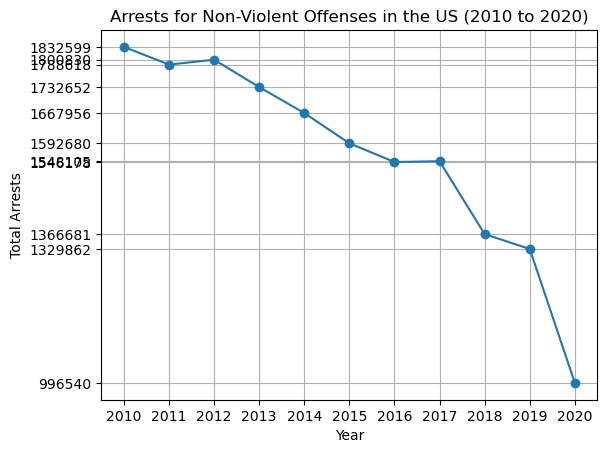

In [25]:
# Use the National Data to show the arrests rate over time

national_total = combined_cleaned.groupby("Year")["Total Arrests"].sum().reset_index()

plt.plot(national_total["Year"], national_total["Total Arrests"], marker="o")

plt.title("Arrests for Non-Violent Offenses in the US (2010 to 2020)")
plt.xlabel("Year")
plt.ylabel("Total Arrests")

plt.yticks(national_total["Total Arrests"])
plt.xticks(national_total["Year"])
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()


In [26]:
# Isolate Crime Data by year for later graphs.
# 2017
crime_df_2017 = combined_cleaned[combined_cleaned["Year"] == 2017]
crime_df_2017.head()

,Year,State,State Name,Population,Total Arrests,Arrests per Capita,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property
7,2017,AL,Alabama,4921532.0,25436,516.830938,13959,877,104,2880,152,1109,2819,1256,2280
18,2017,AK,Alaska,731158.0,5213,712.978590,2356,694,22,623,77,113,219,1004,105
29,2017,AZ,Arizona,7421401.0,52895,712.736045,30433,1735,232,4251,457,1219,2142,10974,1452
40,2017,AR,Arkansas,3030522.0,17981,593.330126,9975,623,40,2138,60,859,918,1574,1794
51,2017,CA,California,39368078.0,153175,389.084273,47080,19541,1573,38214,997,4449,6936,16962,17423


In [27]:
# Create a Dataframe for each state's average TOTAL ARRESTS from 2010 to 2020.
state_avg = combined_cleaned.groupby("State Name")['Total Arrests'].mean().reset_index()
state_avg.columns = ['State', 'Average Total Arrests']
state_avg = state_avg.dropna()
state_avg

,State,Average Total Arrests
0,Alabama,14788.090909
1,Alaska,4874.818182
2,Arizona,51941.272727
3,Arkansas,20262.272727
4,California,169814.818182
5,Colorado,36757.090909
6,Connecticut,19024.545455
7,Delaware,10176.363636
8,District Of Columbia,195.000000
9,Florida,77116.750000


In [28]:
# Create a Dataframe for each state's average arrests PER CAPITA from 2010 to 2020.  
state_avg_pc = combined_cleaned.groupby("State Name")['Arrests per Capita'].mean().reset_index()
state_avg_pc.columns = ['State', 'Average Arrests per Capita']
state_avg_pc = state_avg_pc.dropna()
state_avg_pc

,State,Average Arrests per Capita
0,Alabama,300.477390
1,Alaska,666.725685
2,Arizona,699.885005
3,Arkansas,668.606686
4,California,431.351559
5,Colorado,632.900643
6,Connecticut,534.847157
7,Delaware,1031.239443
8,District Of Columbia,30.202870
9,Florida,354.832020


In [29]:
# Create a Map Illustrating average TOTAL Arrests from 2010 to 2020
# Importing the GeoJSON Map
gdf = gpd.read_file('./Resources/gz_2010_us_040_00_500k.json')

# Applying the state average arrests per capita information to the map
merged_gdf = gdf.merge(state_avg, left_on="NAME", right_on="State")

# Calibrating the display settings
cmap = 'RdYlGn_r'
color_mapping = dict(cmap=cmap, colorbar=True, clabel='Average Total Arrests')

map_plot = merged_gdf.hvplot(
    geo=True,
    hover_cols=['Average Total Arrests', 'State'],
    c='Average Total Arrests',
    title="Average Total Arrests (2010 - 2020)",
    projection=ccrs.PlateCarree(),
    width=800,
    height=600,
    **color_mapping
)

# Format to remove scientific notation from the map
merged_gdf["Average Total Arrests"] = merged_gdf["Average Total Arrests"].apply(lambda x: f"{x:.2f}")

      
# Displaying the map
hv.extension('bokeh')
map_plot

NameError: name 'gpd' is not defined

In [30]:
# Create a Map Illustrating average Arrests PER CAPITA from 2010 to 2020
# GeoJSON Map already imported

# Applying the state average arrests per capita information to the map
merged_gdf2 = gdf.merge(state_avg_pc, left_on="NAME", right_on="State")

# Calibrating the display settings
cmap = 'RdYlGn_r'
color_mapping = dict(cmap=cmap, colorbar=True, clabel='Average Arrests per Capita')

map_plot2 = merged_gdf2.hvplot(
    geo=True,
    hover_cols=['Average Arrests per Capita', 'State'],
    c='Average Arrests per Capita',
    title="Average Arrests per Capita (2010 - 2020)",
    projection=ccrs.PlateCarree(),
    width=800,
    height=600,
    **color_mapping
)

# Format to remove scientific notation from the map
merged_gdf2["Average Arrests per Capita"] = merged_gdf2["Average Arrests per Capita"].apply(lambda x: f"{x:.2f}")

# Displaying the map
hv.extension('bokeh')
map_plot2

NameError: name 'gdf' is not defined

In [31]:
# Reporting Agencies - We wanted to see if the number of agencies reporting to our datasource changed over time to see if that would explain the trends we are seeing.  If the variation is significant, then it should be noted in our findings.

pull_json2 = "./Resources/reporting_agencies.json"

json_response2_df = pd.read_json(pull_json2)
json_response2_df


,data_year,population,total_agency_count,published_agency_count,active_agency_count,covered_agency_count,population_covered,agency_count_nibrs_submitting,agency_count_leoka_submitting,agency_count_pe_submitting,agency_count_srs_submitting,agency_count_asr_submitting,agency_count_hc_submitting,agency_count_supp_submitting,nibrs_population_covered,total_population
0,2010,308745538,18145,16478,20343,24,70197,5872,4693,14749,10541,12735,18145,15284,83441487,314164230
1,2011,311591917,18241,16517,20460,57,128720,5958,4907,15348,10454,12643,18241,15336,86577565,317176318
2,2012,313914040,18295,16651,20611,44,210186,6267,5087,14112,10317,12909,18295,15555,90951899,319689868
3,2013,316128839,18381,16698,20729,73,34475,6395,5352,13177,10145,12431,18381,15591,93425771,321952676
4,2014,318857056,18492,16700,20882,70,79301,6603,5958,13133,10002,12899,18492,15556,94859544,324735099
5,2015,321418820,18433,16900,21000,84,76512,6741,6282,15109,10052,13457,18433,15795,99150343,327511036
6,2016,323127513,18453,16995,21073,95,152896,6951,6437,13252,9934,13688,18453,15877,103585251,329249183
7,2017,329056355,18444,16822,21100,32,55924,7141,6729,13109,9622,13712,18444,15616,106960710,335240234
8,2018,330362587,18556,16879,21224,42,20643,7536,7189,13600,9284,13090,18556,15679,121714717,336537547
9,2019,331433049,18663,16834,21323,24,24594,8951,8648,13359,7854,12639,18663,15889,154918234,337557044


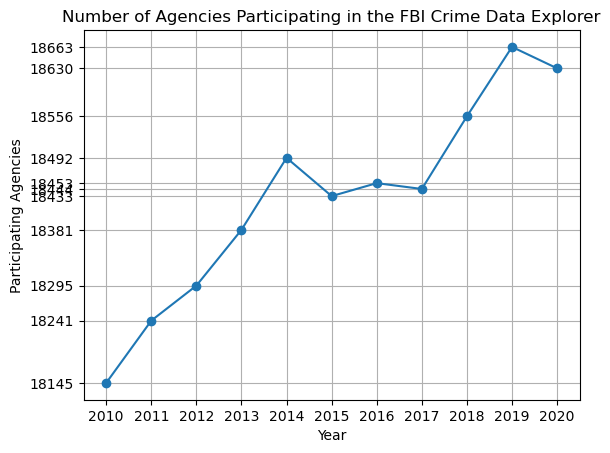

In [32]:
reporting_df = json_response2_df.groupby("data_year")["total_agency_count"].sum().reset_index()

plt.plot(reporting_df["data_year"], reporting_df["total_agency_count"], marker="o")

plt.title("Number of Agencies Participating in the FBI Crime Data Explorer")
plt.xlabel("Year")
plt.ylabel("Participating Agencies")

plt.yticks(reporting_df["total_agency_count"])
plt.xticks(reporting_df["data_year"])
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()

In [33]:
pull_json3 = "./Resources/law_enforcement_employees.json"

json_response3_df = pd.read_json(pull_json3)
json_response3_df

,data_year,population,agency_count_pe_submitting,male_officer_ct,male_civilian_ct,male_total_ct,female_officer_ct,female_civilian_ct,female_total_ct,officer_ct,civilian_ct,total_pe_ct,pe_ct_per_1000
0,2010,291519785,13862,622432,121036,743468,83170,187835,271005,705602,308871,1014473,3.48
1,2011,302002906,14489,636140,121145,757285,97029,188674,285703,733169,309819,1042988,3.45
2,2012,285534702,13517,605315,114219,719534,83576,173457,257033,688891,287676,976567,3.42
3,2013,269918333,12644,567434,108677,676111,75978,168054,244032,643412,276731,920143,3.41
4,2014,276219761,12728,570021,110690,680711,79786,165197,244983,649807,275887,925694,3.35
5,2015,296341200,14535,603552,118793,722345,81589,177488,259077,685141,296281,981422,3.31
6,2016,278868906,12782,583127,116616,699743,80779,175728,256507,663906,292344,956250,3.43
7,2017,282626440,12655,589524,113978,703502,84157,173555,257712,673681,287533,961214,3.40
8,2018,292030649,13055,614756,116765,731521,90050,177688,267738,704806,294453,999259,3.42
9,2019,292070813,12808,620647,123771,744418,92112,184895,277007,712759,308666,1021425,3.50


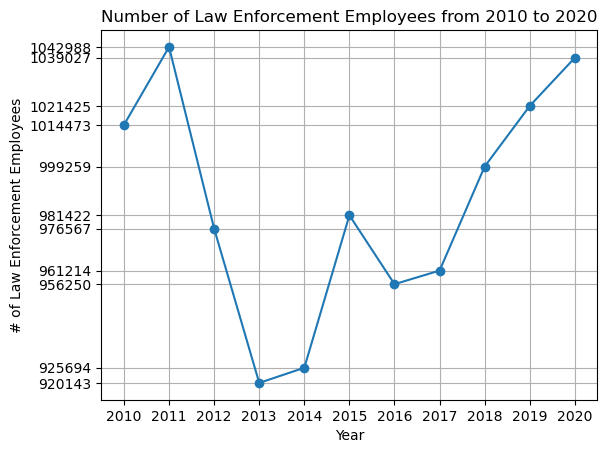

In [34]:
le_df = json_response3_df.groupby("data_year")["total_pe_ct"].sum().reset_index()

plt.plot(le_df["data_year"], le_df["total_pe_ct"], marker="o")

plt.title("Number of Law Enforcement Employees from 2010 to 2020")
plt.xlabel("Year")
plt.ylabel("# of Law Enforcement Employees")

plt.yticks(le_df["total_pe_ct"])
plt.xticks(le_df["data_year"])
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()

In [35]:
le_data_list = []

for state_id in state_id_list:
    le_url = f"https://api.usa.gov/crime/fbi/cde/pe/state/{state_id}/byYearRange?from=2010&to=2020&API_KEY={fbi_cde_key}"
    le_response = requests.get(le_url).json()

    if isinstance(le_response, list):
        for data in le_response:
            le_data_list.append(data)

le_data_list

[{'state_id': 2,
  'state_name': 'Alabama',
  'state_abbr': 'AL',
  'data_year': 2010,
  'population': '4642673',
  'agency_count_pe_submitting': '318',
  'male_officer_ct': '10134',
  'male_civilian_ct': '2016',
  'male_total_ct': '12150',
  'female_officer_ct': '796',
  'female_civilian_ct': '3259',
  'female_total_ct': '4055',
  'officer_ct': '10930',
  'civilian_ct': '5275',
  'total_pe_ct': '16205',
  'pe_ct_per_1000': '3.49'},
 {'state_id': 2,
  'state_name': 'Alabama',
  'state_abbr': 'AL',
  'data_year': 2011,
  'population': '4463637',
  'agency_count_pe_submitting': '325',
  'male_officer_ct': '10019',
  'male_civilian_ct': '2015',
  'male_total_ct': '12034',
  'female_officer_ct': '756',
  'female_civilian_ct': '3395',
  'female_total_ct': '4151',
  'officer_ct': '10775',
  'civilian_ct': '5410',
  'total_pe_ct': '16185',
  'pe_ct_per_1000': '3.63'},
 {'state_id': 2,
  'state_name': 'Alabama',
  'state_abbr': 'AL',
  'data_year': 2012,
  'population': '3793835',
  'agency_co

In [37]:
json_data2 = json.dumps(le_data_list, indent=4)

file_path = "LE_Data_Raw_2010_2020.json"

with open(file_path,'w') as json_file:
    json_file.write(json_data2)

print(f"API response saved to {file_path}")

API response saved to LE_Data_Raw_2010_2020.json


In [38]:
pull_json4 = "LE_Data_Raw_2010_2020.json"

json_response4_df = pd.read_json(pull_json4)
json_response4_df.head()

,state_id,state_name,state_abbr,data_year,population,agency_count_pe_submitting,male_officer_ct,male_civilian_ct,male_total_ct,female_officer_ct,female_civilian_ct,female_total_ct,officer_ct,civilian_ct,total_pe_ct,pe_ct_per_1000
0,2,Alabama,AL,2010,4642673,318,10134,2016,12150,796,3259,4055,10930,5275,16205,3.49
1,2,Alabama,AL,2011,4463637,325,10019,2015,12034,756,3395,4151,10775,5410,16185,3.63
2,2,Alabama,AL,2012,3793835,267,7951,1574,9525,682,2538,3220,8633,4112,12745,3.36
3,2,Alabama,AL,2013,4255554,282,8773,1718,10491,719,2963,3682,9492,4681,14173,3.33
4,2,Alabama,AL,2014,3398260,229,7131,1398,8529,567,2359,2926,7698,3757,11455,3.37


In [ ]:
# Merge combined_cleaned and json_response4_df

In [39]:
combined_cleaned.head()

,Year,State,State Name,Population,Total Arrests,Arrests per Capita,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property
0,2010,AL,Alabama,4921532.0,26725,543.021970,12691,658,108,2183,163,1178,6370,1878,1496
1,2011,AL,Alabama,4921532.0,590,11.988137,509,5,0,17,16,4,9,10,20
2,2012,AL,Alabama,4921532.0,559,11.358252,462,3,0,24,20,6,22,4,18
3,2013,AL,Alabama,4921532.0,759,15.422027,670,2,1,11,17,7,15,6,30
4,2014,AL,Alabama,4921532.0,1065,21.639603,877,10,1,36,13,18,59,15,36


In [40]:
combined_cleaned2 = combined_cleaned.rename(columns=
                              {"Arrests per Capita": "Arrests per Capita (100,000)"})
combined_cleaned2.head()

,Year,State,State Name,Population,Total Arrests,"Arrests per Capita (100,000)",Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property
0,2010,AL,Alabama,4921532.0,26725,543.021970,12691,658,108,2183,163,1178,6370,1878,1496
1,2011,AL,Alabama,4921532.0,590,11.988137,509,5,0,17,16,4,9,10,20
2,2012,AL,Alabama,4921532.0,559,11.358252,462,3,0,24,20,6,22,4,18
3,2013,AL,Alabama,4921532.0,759,15.422027,670,2,1,11,17,7,15,6,30
4,2014,AL,Alabama,4921532.0,1065,21.639603,877,10,1,36,13,18,59,15,36


In [41]:
json_response4_df.head()

,state_id,state_name,state_abbr,data_year,population,agency_count_pe_submitting,male_officer_ct,male_civilian_ct,male_total_ct,female_officer_ct,female_civilian_ct,female_total_ct,officer_ct,civilian_ct,total_pe_ct,pe_ct_per_1000
0,2,Alabama,AL,2010,4642673,318,10134,2016,12150,796,3259,4055,10930,5275,16205,3.49
1,2,Alabama,AL,2011,4463637,325,10019,2015,12034,756,3395,4151,10775,5410,16185,3.63
2,2,Alabama,AL,2012,3793835,267,7951,1574,9525,682,2538,3220,8633,4112,12745,3.36
3,2,Alabama,AL,2013,4255554,282,8773,1718,10491,719,2963,3682,9492,4681,14173,3.33
4,2,Alabama,AL,2014,3398260,229,7131,1398,8529,567,2359,2926,7698,3757,11455,3.37


In [42]:
# Rename certain heads on the json_response4_df
enforcement_df = json_response4_df.rename(columns=
                              {"state_name": "State Name",
                               "state_abbr": "State",
                               "data_year": "Year",
                               "total_pe_ct": "Total Law Enforcement Employees"
                              })
enforcement_df.head()

,state_id,State Name,State,Year,population,agency_count_pe_submitting,male_officer_ct,male_civilian_ct,male_total_ct,female_officer_ct,female_civilian_ct,female_total_ct,officer_ct,civilian_ct,Total Law Enforcement Employees,pe_ct_per_1000
0,2,Alabama,AL,2010,4642673,318,10134,2016,12150,796,3259,4055,10930,5275,16205,3.49
1,2,Alabama,AL,2011,4463637,325,10019,2015,12034,756,3395,4151,10775,5410,16185,3.63
2,2,Alabama,AL,2012,3793835,267,7951,1574,9525,682,2538,3220,8633,4112,12745,3.36
3,2,Alabama,AL,2013,4255554,282,8773,1718,10491,719,2963,3682,9492,4681,14173,3.33
4,2,Alabama,AL,2014,3398260,229,7131,1398,8529,567,2359,2926,7698,3757,11455,3.37


In [43]:
# Filter json_response4
cleaned_enforcement_df = enforcement_df[[
                        "Year", 
                        "State", 
                        "State Name",
                        "Total Law Enforcement Employees", 
]]

cleaned_enforcement_df

,Year,State,State Name,Total Law Enforcement Employees
0,2010,AL,Alabama,16205
1,2011,AL,Alabama,16185
2,2012,AL,Alabama,12745
3,2013,AL,Alabama,14173
4,2014,AL,Alabama,11455
...,...,...,...,...
570,2016,WY,Wyoming,1939
571,2017,WY,Wyoming,2025
572,2018,WY,Wyoming,2323
573,2019,WY,Wyoming,2263


In [122]:
#Create a data frame for scatter1 chart

scatter_df = cleaned_enforcement_df.merge(combined_cleaned2, how="left", on=["Year", "State","State Name"] )
scatter1_df = scatter_df.dropna(how='any')
scatter1_df


,Year,State,State Name,Total Law Enforcement Employees,Population,Total Arrests,"Arrests per Capita (100,000)",Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property
0,2010,AL,Alabama,16205,4921532.0,26725.0,543.021970,12691.0,658.0,108.0,2183.0,163.0,1178.0,6370.0,1878.0,1496.0
1,2011,AL,Alabama,16185,4921532.0,590.0,11.988137,509.0,5.0,0.0,17.0,16.0,4.0,9.0,10.0,20.0
2,2012,AL,Alabama,12745,4921532.0,559.0,11.358252,462.0,3.0,0.0,24.0,20.0,6.0,22.0,4.0,18.0
3,2013,AL,Alabama,14173,4921532.0,759.0,15.422027,670.0,2.0,1.0,11.0,17.0,7.0,15.0,6.0,30.0
4,2014,AL,Alabama,11455,4921532.0,1065.0,21.639603,877.0,10.0,1.0,36.0,13.0,18.0,59.0,15.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2016,WY,Wyoming,1939,582328.0,3416.0,586.610982,2194.0,109.0,48.0,233.0,12.0,49.0,197.0,531.0,43.0
571,2017,WY,Wyoming,2025,582328.0,3192.0,548.144688,1995.0,130.0,38.0,217.0,18.0,49.0,158.0,493.0,94.0
572,2018,WY,Wyoming,2323,582328.0,2876.0,493.879738,1818.0,128.0,19.0,243.0,6.0,36.0,127.0,419.0,80.0
573,2019,WY,Wyoming,2263,582328.0,2586.0,444.079625,1562.0,104.0,27.0,229.0,1.0,29.0,112.0,467.0,55.0


In [125]:
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x 9 {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
#     plt.xlabel("Population")
#     plt.ylabel("Arrests")
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
 

The r-value is 0.7399047739327667


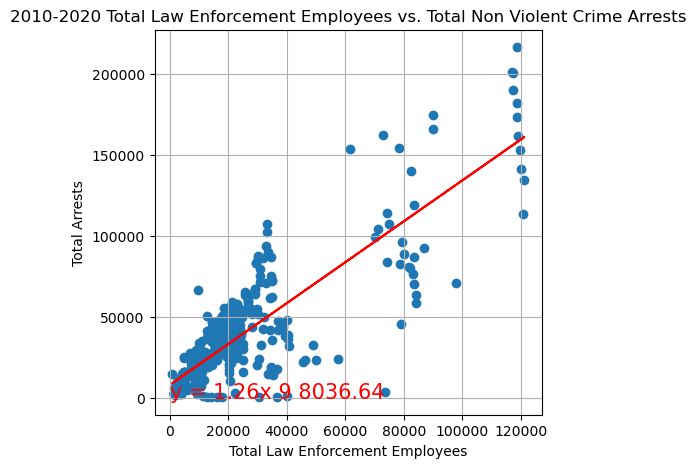

In [216]:
# Create a scatter plot which compares total law enforcement employees to total arrests 2010-2020

scatter1_df.plot(kind="scatter", x="Total Law Enforcement Employees", y="Total Arrests",
                 grid=True,
                 figsize=(5,5),
                 title="2010-2020 Total Law Enforcement Employees vs. Total Non Violent Crime Arrests",
                 )

x_values = scatter1_df["Total Law Enforcement Employees"]
y_values = scatter1_df["Total Arrests"]
plot_linear_regression(x_values, y_values, "Total Law Enforcement Employees", (6, -10))

plt.show()

The r-value is 0.8006085191403081


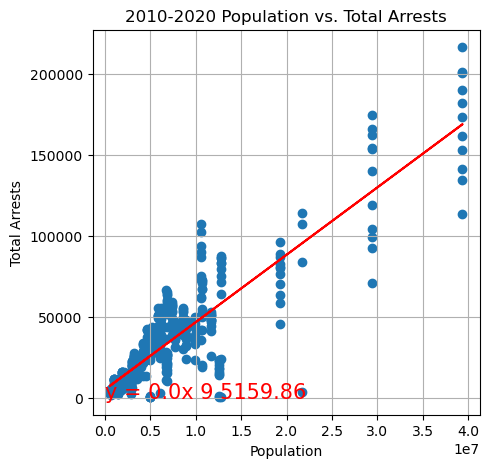

In [215]:
# Create a scatter plot which compares population to total arrests 2010-2020

scatter1_df.plot(kind="scatter", x="Population", y="Total Arrests",
                       grid=True,
                       figsize=(5,5),
                       title="2010-2020 Population vs. Total Arrests")

x_values = scatter1_df["Population"]
y_values = scatter1_df["Total Arrests"]
plot_linear_regression(x_values, y_values, "Population", (6, -10))

plt.show()

In [115]:
#Select certain columns for scatter2 chart
scatter1_mods_df = scatter1_df[["Year", "State", "State Name","Population","Total Law Enforcement Employees","Total Arrests", "Arrests per Capita (100,000)"]]
scatter1_mods_df

,Year,State,State Name,Population,Total Law Enforcement Employees,Total Arrests,"Arrests per Capita (100,000)"
0,2010,AL,Alabama,4921532.0,16205,26725.0,543.021970
1,2011,AL,Alabama,4921532.0,16185,590.0,11.988137
2,2012,AL,Alabama,4921532.0,12745,559.0,11.358252
3,2013,AL,Alabama,4921532.0,14173,759.0,15.422027
4,2014,AL,Alabama,4921532.0,11455,1065.0,21.639603
...,...,...,...,...,...,...,...
570,2016,WY,Wyoming,582328.0,1939,3416.0,586.610982
571,2017,WY,Wyoming,582328.0,2025,3192.0,548.144688
572,2018,WY,Wyoming,582328.0,2323,2876.0,493.879738
573,2019,WY,Wyoming,582328.0,2263,2586.0,444.079625


In [128]:
#Create a Per Capita (100,000) calculation for the law enforcement employee


scatter1_mods_df["Law Enforcement Employees per Capita (100,000)"] = scatter1_mods_df["Total Law Enforcement Employees"] / scatter1_mods_df["Population"] * 100000


scatter2_df = scatter1_mods_df[["Year", "State", "State Name","Population","Total Arrests", "Arrests per Capita (100,000)", "Total Law Enforcement Employees", "Law Enforcement Employees per Capita (100,000)"]]
scatter2_df

C:\Users\kento\AppData\Local\Temp\ipykernel_15720\3405989128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter1_mods_df["Law Enforcement Employees per Capita (100,000)"] = scatter1_mods_df["Total Law Enforcement Employees"] / scatter1_mods_df["Population"] * 100000


,Year,State,State Name,Population,Total Arrests,"Arrests per Capita (100,000)",Total Law Enforcement Employees,"Law Enforcement Employees per Capita (100,000)"
0,2010,AL,Alabama,4921532.0,26725.0,543.021970,16205,329.267391
1,2011,AL,Alabama,4921532.0,590.0,11.988137,16185,328.861013
2,2012,AL,Alabama,4921532.0,559.0,11.358252,12745,258.964079
3,2013,AL,Alabama,4921532.0,759.0,15.422027,14173,287.979434
4,2014,AL,Alabama,4921532.0,1065.0,21.639603,11455,232.752728
...,...,...,...,...,...,...,...,...
570,2016,WY,Wyoming,582328.0,3416.0,586.610982,1939,332.973857
571,2017,WY,Wyoming,582328.0,3192.0,548.144688,2025,347.742166
572,2018,WY,Wyoming,582328.0,2876.0,493.879738,2323,398.916075
573,2019,WY,Wyoming,582328.0,2586.0,444.079625,2263,388.612603


The r-value is 0.009317897676211988


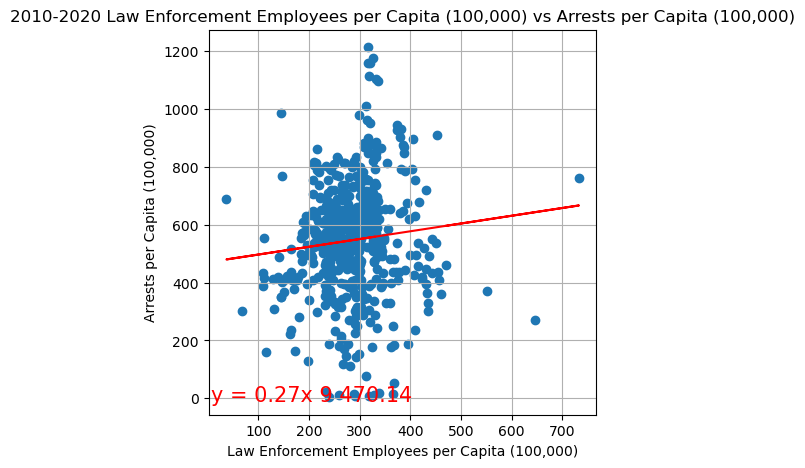

In [214]:
# Create a scatter plot which compares Law Enforcement Employees per Capita (100,000) to Arrests per Capita (100,000) 2010-2020

scatter2_df.plot(kind="scatter", x="Law Enforcement Employees per Capita (100,000)", y="Arrests per Capita (100,000)",
                       grid=True,
                       figsize=(5,5),
                       title="2010-2020 Law Enforcement Employees per Capita (100,000) vs Arrests per Capita (100,000)")

x_values = scatter2_df["Law Enforcement Employees per Capita (100,000)"]
y_values = scatter2_df["Arrests per Capita (100,000)"]
plot_linear_regression(x_values, y_values, "Law Enforcement Employees per Capita (100,000)", (6, -10))


plt.show()

In [132]:
scatter2_df

,Year,State,State Name,Population,Total Arrests,"Arrests per Capita (100,000)",Total Law Enforcement Employees,"Law Enforcement Employees per Capita (100,000)"
0,2010,AL,Alabama,4921532.0,26725.0,543.021970,16205,329.267391
1,2011,AL,Alabama,4921532.0,590.0,11.988137,16185,328.861013
2,2012,AL,Alabama,4921532.0,559.0,11.358252,12745,258.964079
3,2013,AL,Alabama,4921532.0,759.0,15.422027,14173,287.979434
4,2014,AL,Alabama,4921532.0,1065.0,21.639603,11455,232.752728
...,...,...,...,...,...,...,...,...
570,2016,WY,Wyoming,582328.0,3416.0,586.610982,1939,332.973857
571,2017,WY,Wyoming,582328.0,3192.0,548.144688,2025,347.742166
572,2018,WY,Wyoming,582328.0,2876.0,493.879738,2323,398.916075
573,2019,WY,Wyoming,582328.0,2586.0,444.079625,2263,388.612603


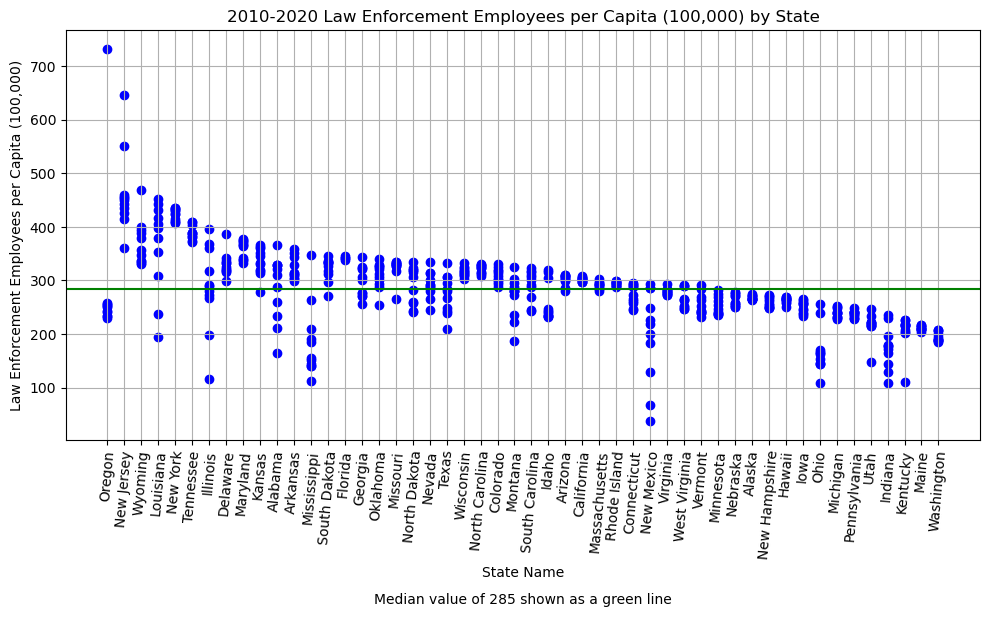

In [219]:
#Create a bar chart to show Law Enforcement Employees per 100,000 by state 2010-2020:

scatter2_sorted = scatter2_df.sort_values(by="Law Enforcement Employees per Capita (100,000)", ascending=False)
median_leepc = round(np.median(scatter2_sorted['Law Enforcement Employees per Capita (100,000)']))


plt.figure(figsize=(10, 6))
plt.scatter(x=scatter2_sorted['State Name'], y=scatter2_sorted['Law Enforcement Employees per Capita (100,000)'], color='blue')
plt.xlabel('State Name')
plt.ylabel('Law Enforcement Employees per Capita (100,000)')
plt.title('2010-2020 Law Enforcement Employees per Capita (100,000) by State')
plt.xticks(rotation=85)
plt.grid(axis="both")
plt.axhline(y=median_leepc, color='green')
plt.tight_layout()
plt.text(0.5, -0.4, f'Median value of {median_leepc} shown as a green line', transform=plt.gca().transAxes, ha='center')
plt.show()


In [172]:
median_leepc = np.median(scatter2_sorted['Law Enforcement Employees per Capita (100,000)'])
median_leepc


284.8981825449756

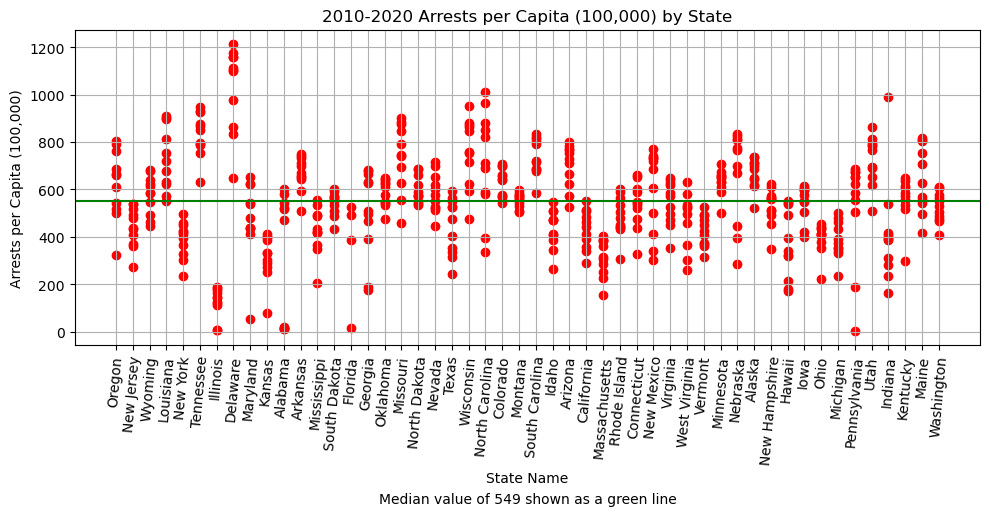

In [220]:
#Create a bar chart to show Arrests per 100,000 by state 2010-2020:

scatter2_sorted = scatter2_df.sort_values(by="Law Enforcement Employees per Capita (100,000)", ascending=False)

median_arrests = round(np.median(scatter2_sorted["Arrests per Capita (100,000)"]))

plt.figure(figsize=(10, 6))
plt.scatter(x=scatter2_sorted['State Name'], y=scatter2_sorted['Arrests per Capita (100,000)'], color='red')
plt.xlabel('State Name')
plt.ylabel('Arrests per Capita (100,000)')
plt.title('2010-2020 Arrests per Capita (100,000) by State')
plt.xticks(rotation=85)
plt.grid(axis="both")
plt.axhline(y=median_arrests, color='green')
plt.text(0.5, -0.5, f'Median value of {median_arrests} shown as a green line', transform=plt.gca().transAxes, ha='center')
plt.tight_layout()

plt.show()

In [180]:
median_arrests = np.median(scatter2_sorted["Arrests per Capita (100,000)"])
median_arrests

549.3758175304945